In [1]:
%load_ext autotime

In [2]:
#tfidf to remove common words like aquarium
#spell check
#remove more common words
#Experiment with different parts of speech
#NMF

time: 14 ms


In [3]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#4whatdoesldado

time: 17 ms


In [4]:
#import modules
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


time: 1.88 s


In [5]:
# prepare NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


time: 288 ms


In [6]:
#import data
df=pd.read_excel('20180821_Tatvam_Export.xlsx')

time: 2.66 s


In [7]:
df.head()

,Unique ID,Review Title,Review Comment,Tatvam Rating,User Rating,Source Name,Review URL,Date,Name,Customer,Parent Value,Value,Tag Tatvam Rating,Review Month
0,5779066,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Brittany Chadwick,Georgia Aquarium,NaN,NaN,NaN,June
1,5779068,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Katie Holland Stackable,Georgia Aquarium,NaN,NaN,NaN,June
2,5779071,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Danielle Desjardins Neydorff,Georgia Aquarium,NaN,NaN,NaN,June
3,5779076,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Leo Villatoro,Georgia Aquarium,NaN,NaN,NaN,June
4,5779077,NaN,NaN,0,5,Google Reviews,https://www.google.co.in/maps/place/Georgia+Aq...,"Wednesday, June 6, 2018",Rebecca Fetterolf,Georgia Aquarium,NaN,NaN,NaN,June


time: 31.9 ms


In [8]:
#Remove NaN from Comments
df=df.dropna(subset=['Review Comment'])


time: 19.9 ms


In [9]:
# Convert to list
data = df['Review Comment'].values.tolist()

time: 997 µs


In [10]:
#tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

time: 4.44 s


In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


time: 15.5 s


In [12]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

time: 17 ms


In [13]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


time: 6min 22s


In [14]:
data_lemmatized

[['overprice'],
 ['police_officer',
  'do',
  'not',
  'think',
  'bring',
  'fire',
  'arm',
  'aquirium',
  'security',
  'office',
  'make',
  'feel',
  'safe',
  'right',
  'customer_service',
  'manager',
  'rude'],
 ['whale', 'shark', 'look', 'retarded', 'fish', 'wave', 'back', 'lame'],
 ['zoo',
  'people',
  'rather',
  'fish',
  'crowd',
  'tiny',
  'hallway',
  'sign',
  'direct',
  'wrong',
  'area',
  'bad',
  'aquarium'],
 ['zoo',
  'people',
  'rather',
  'fish',
  'crowd',
  'tiny',
  'hallway',
  'sign',
  'direct',
  'wrong',
  'area',
  'bad',
  'aquarium'],
 ['hard',
  'describe',
  'disappointed',
  'claim',
  'large',
  'aquarium',
  'likely',
  'exaggerated',
  'square',
  'footage',
  'dedicate',
  'sponsorship',
  'advertise',
  'merchandise',
  'research',
  'phone',
  'find'],
 ['worth',
  'total',
  'chaos',
  'long',
  'line',
  'astronomical',
  'price',
  'much',
  'see',
  'food',
  'price',
  'highway_robbery',
  'disappointed'],
 ['worth',
  'total',
  '

time: 310 ms


In [15]:
print(data_lemmatized[:6])

[['overprice'], ['police_officer', 'do', 'not', 'think', 'bring', 'fire', 'arm', 'aquirium', 'security', 'office', 'make', 'feel', 'safe', 'right', 'customer_service', 'manager', 'rude'], ['whale', 'shark', 'look', 'retarded', 'fish', 'wave', 'back', 'lame'], ['zoo', 'people', 'rather', 'fish', 'crowd', 'tiny', 'hallway', 'sign', 'direct', 'wrong', 'area', 'bad', 'aquarium'], ['zoo', 'people', 'rather', 'fish', 'crowd', 'tiny', 'hallway', 'sign', 'direct', 'wrong', 'area', 'bad', 'aquarium'], ['hard', 'describe', 'disappointed', 'claim', 'large', 'aquarium', 'likely', 'exaggerated', 'square', 'footage', 'dedicate', 'sponsorship', 'advertise', 'merchandise', 'research', 'phone', 'find']]
time: 1.99 ms


In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

time: 1.74 s


In [17]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('overprice', 1)],
 [('aquirium', 1),
  ('arm', 1),
  ('bring', 1),
  ('customer_service', 1),
  ('do', 1),
  ('feel', 1),
  ('fire', 1),
  ('make', 1),
  ('manager', 1),
  ('not', 1),
  ('office', 1),
  ('police_officer', 1),
  ('right', 1),
  ('rude', 1),
  ('safe', 1),
  ('security', 1),
  ('think', 1)],
 [('back', 1),
  ('fish', 1),
  ('lame', 1),
  ('look', 1),
  ('retarded', 1),
  ('shark', 1),
  ('wave', 1),
  ('whale', 1)],
 [('fish', 1),
  ('aquarium', 1),
  ('area', 1),
  ('bad', 1),
  ('crowd', 1),
  ('direct', 1),
  ('hallway', 1),
  ('people', 1),
  ('rather', 1),
  ('sign', 1),
  ('tiny', 1),
  ('wrong', 1),
  ('zoo', 1)],
 [('fish', 1),
  ('aquarium', 1),
  ('area', 1),
  ('bad', 1),
  ('crowd', 1),
  ('direct', 1),
  ('hallway', 1),
  ('people', 1),
  ('rather', 1),
  ('sign', 1),
  ('tiny', 1),
  ('wrong', 1),
  ('zoo', 1)]]

time: 8.98 ms


In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

time: 56.8 s


In [19]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.081*"animal" + 0.046*"dive" + 0.045*"ocean" + 0.028*"small" + '
  '0.028*"display" + 0.024*"do" + 0.022*"seem" + 0.020*"marine" + '
  '0.020*"bring" + 0.018*"absolutely"'),
 (1,
  '0.145*"aquarium" + 0.069*"visit" + 0.042*"experience" + 0.039*"place" + '
  '0.035*"atlanta" + 0.029*"georgia" + 0.028*"good" + 0.028*"family" + '
  '0.027*"kid" + 0.024*"well"'),
 (2,
  '0.077*"trip" + 0.058*"cool" + 0.051*"touch" + 0.038*"beluga" + '
  '0.036*"always" + 0.028*"busy" + 0.028*"highlight" + 0.025*"diver" + '
  '0.024*"belugas" + 0.021*"like"'),
 (3,
  '0.149*"show" + 0.086*"get" + 0.055*"amazing" + 0.048*"day" + 0.048*"love" + '
  '0.043*"ticket" + 0.037*"go" + 0.031*"lot" + 0.025*"first" + 0.018*"time"'),
 (4,
  '0.105*"penguin" + 0.071*"otter" + 0.067*"child" + 0.066*"easy" + '
  '0.061*"water" + 0.028*"specie" + 0.028*"tell" + 0.019*"visitor" + '
  '0.019*"glad" + 0.014*"let"'),
 (5,
  '0.069*"see" + 0.041*"exhibit" + 0.037*"great" + 0.035*"time" + '
  '0.032*"dolphin" + 0.027*"g

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.007280678212183

Coherence Score:  0.31717720529305693
time: 20.2 s


In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'lda_10.html')

time: 5.46 s


In [22]:
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      27.657001        1       1  0.316779 -0.010919
1      17.778362        1       2  0.195529  0.215561
3      13.971266        1       3  0.237961 -0.200889
7       8.441893        1       4 -0.117412 -0.288836
6       7.164610        1       5 -0.089529  0.088881
9       6.474862        1       6 -0.112481  0.050035
0       5.877785        1       7 -0.111943 -0.039615
8       4.831503        1       8 -0.107764  0.060543
4       3.972377        1       9 -0.089479  0.189963
2       3.830343        1      10 -0.121660 -0.064724, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
104   Default  15938.000000        show  15938.000000  30.0000  30.0000
26    Default  22990.000000    aquarium  22990.000000  29.0000  29.0000
25    Default  11088.000000       whale  11088.000000  28.0000  28.0000
23    Default   9740.000000       shark   9740.000000  27.0000  27.0000
214   Default   8551.000000         sea   8551.000000  26.0000  26.0000
62    Default  14169.000000         see  14169.000000  25.0000  25.0000
89    Default   9952.000000         get   9952.000000  24.0000  24.0000
317   Default   9138.000000       visit   9138.000000  23.0000  23.0000
569   Default   4631.000000        lion   4631.000000  22.0000  22.0000
515   Default   4930.000000        tank   4930.000000  21.0000  21.0000
75    Default   5757.000000     amazing   5757.000000  20.0000  20.0000
47    Default   3439.000000       large   3439.000000  19.0000  19.0000
153   Default   8609.000000     exhibit   8609.000000  18.0000  18.0000
245   Default   3092.000000     penguin   3092.000000  17.0000  17.0000
76    Default   3566.000000      animal   3566.000000  16.0000  16.0000
84    Default   4997.000000         day   4997.000000  15.0000  15.0000
95    Default   4972.000000        love   4972.000000  14.0000  14.0000
281   Default   7571.000000       great   7571.000000  13.0000  13.0000
90    Default   9321.000000          go   9321.000000  12.0000  12.0000
204   Default   5909.000000  experience   5909.000000  11.0000  11.0000
168   Default   5167.000000       place   5167.000000  10.0000  10.0000
107   Default   4453.000000      ticket   4453.000000   9.0000   9.0000
448   Default   4613.000000     atlanta   4613.000000   8.0000   8.0000
108   Default   9094.000000        time   9094.000000   7.0000   7.0000
361   Default   7218.000000     dolphin   7218.000000   6.0000   6.0000
19    Default   2933.000000        fish   2933.000000   5.0000   5.0000
574   Default   2184.000000        trip   2184.000000   4.0000   4.0000
738   Default   2536.000000        tour   2536.000000   3.0000   3.0000
505   Default   2480.000000     parking   2480.000000   2.0000   2.0000
241   Default   2097.000000       otter   2097.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
562   Topic10   1637.075073        cool   1637.960938   3.2617  -2.8550
1467  Topic10   1453.022095       touch   1453.907959   3.2616  -2.9743
186   Topic10   1083.284180      beluga   1084.170044   3.2614  -3.2680
661   Topic10   1034.206055      always   1035.091919   3.2614  -3.3143
501   Topic10    805.762146        busy    806.647949   3.2611  -3.5639
565   Topic10    801.940674   highlight    802.826538   3.2611  -3.5687
2621  Topic10    714.190247       diver    715.076172   3.2610  -3.6846
888   Topic10    682.836304     belugas    683.722107   3.2609  -3.7295
980   Topic10    587.952087        like    588.837952   3.2607  -3.8791
388   Topic10    562.055420   enjoyable    562.941345   3.2606  -3.9241
611   Topic10    561.765442      decide    562.651367   3.2606  -3.9246
184   Topic10    531.736694         put    532.622559   3.2606  -3.9796
191   Topic10    497.190765      school    498.076630   3.2604  -4.04

time: 27.9 ms


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

time: 17 ms


In [24]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=4)

time: 4min 22s


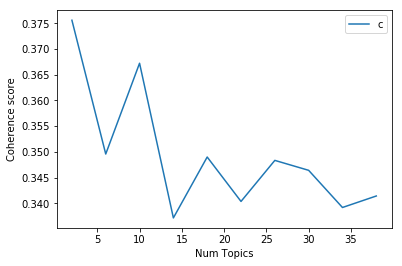

time: 187 ms


In [25]:
# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [26]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3756
Num Topics = 6  has Coherence Value of 0.3496
Num Topics = 10  has Coherence Value of 0.3672
Num Topics = 14  has Coherence Value of 0.3372
Num Topics = 18  has Coherence Value of 0.349
Num Topics = 22  has Coherence Value of 0.3404
Num Topics = 26  has Coherence Value of 0.3483
Num Topics = 30  has Coherence Value of 0.3464
Num Topics = 34  has Coherence Value of 0.3392
Num Topics = 38  has Coherence Value of 0.3414
time: 57.8 ms


In [27]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.017*"shark" + 0.017*"whale" + 0.013*"aquarium" + 0.012*"experience" + '
  '0.011*"amazing" + 0.011*"touch" + 0.010*"see" + 0.009*"go" + 0.009*"swim" + '
  '0.008*"ray"'),
 (1,
  '0.040*"show" + 0.036*"aquarium" + 0.032*"whale" + 0.028*"shark" + '
  '0.023*"see" + 0.021*"sea" + 0.021*"dolphin" + 0.017*"exhibit" + '
  '0.017*"visit" + 0.014*"great"'),
 (2,
  '0.033*"aquarium" + 0.019*"see" + 0.017*"get" + 0.014*"whale" + '
  '0.012*"shark" + 0.012*"go" + 0.012*"tank" + 0.011*"show" + 0.011*"animal" + '
  '0.011*"visit"'),
 (3,
  '0.034*"aquarium" + 0.018*"visit" + 0.016*"good" + 0.013*"experience" + '
  '0.011*"family" + 0.011*"encounter" + 0.011*"staff" + 0.010*"place" + '
  '0.009*"great" + 0.009*"food"'),
 (4,
  '0.036*"aquarium" + 0.028*"time" + 0.017*"go" + 0.017*"great" + 0.016*"see" '
  '+ 0.012*"kid" + 0.011*"recommend" + 0.011*"exhibit" + 0.010*"worth" + '
  '0.010*"crowd"'),
 (5,
  '0.033*"get" + 0.026*"go" + 0.020*"ticket" + 0.020*"aquarium" + 0.019*"show" '
  '+ 0.0

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
pyLDAvis.save_html(vis, 'lda_6.html')
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      24.546831        1       1  0.010346 -0.006970
1      24.068846        1       2 -0.008422 -0.007036
5      19.347883        1       3  0.067616 -0.072674
4      12.900664        1       4  0.074016 -0.070851
3      11.701541        1       5  0.063535  0.158130
0       7.434238        1       6 -0.207091 -0.000599, topic_info=     Category          Freq          Term         Total  loglift  logprob
term                                                                     
25    Default   9715.000000         whale   9715.000000  30.0000  30.0000
23    Default   8752.000000         shark   8752.000000  29.0000  29.0000
108   Default   8935.000000          time   8935.000000  28.0000  28.0000
107   Default   5802.000000        ticket   5802.000000  27.0000  27.0000
214   Default   5995.000000           sea   5995.000000  26.0000  26.0000
1194  Default   1268.000000     encounter   1268.000000  25.0000  25.0000
75    Default   4104.000000       amazing   4104.000000  24.0000  24.0000
711   Default   2042.000000           ray   2042.000000  23.0000  23.0000
89    Default  10945.000000           get  10945.000000  22.0000  22.0000
1583  Default   1277.000000          dive   1277.000000  21.0000  21.0000
1467  Default   1358.000000         touch   1358.000000  20.0000  20.0000
1654  Default   1253.000000          swim   1253.000000  19.0000  19.0000
204   Default   5661.000000    experience   5661.000000  18.0000  18.0000
104   Default  13667.000000          show  13667.000000  17.0000  17.0000
90    Default  10146.000000            go  10146.000000  16.0000  16.0000
26    Default  22319.000000      aquarium  22319.000000  15.0000  15.0000
281   Default   6534.000000         great   6534.000000  14.0000  14.0000
361   Default   6046.000000       dolphin   6046.000000  13.0000  13.0000
569   Default   3164.000000          lion   3164.000000  12.0000  12.0000
515   Default   4566.000000          tank   4566.000000  11.0000  11.0000
64    Default   4089.000000         worth   4089.000000  10.0000  10.0000
189   Default   5919.000000          good   5919.000000   9.0000   9.0000
71    Default   1291.000000          save   1291.000000   8.0000   8.0000
80    Default   2180.000000           buy   2180.000000   7.0000   7.0000
99    Default   2043.000000        online   2043.000000   6.0000   6.0000
56    Default   3158.000000          food   3158.000000   5.0000   5.0000
133   Default   2733.000000         staff   2733.000000   4.0000   4.0000
280   Default   3636.000000        family   3636.000000   3.0000   3.0000
2265  Default    440.000000         later    440.000000   2.0000   2.0000
821   Default   1661.000000       awesome   1661.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
3060   Topic6    152.613235  gentle_giant    209.523880   2.2821  -5.8909
1654   Topic6    484.044037          swim   1253.056030   1.6479  -4.7367
711    Topic6    462.537689           ray   2042.639648   1.1138  -4.7821
23     Topic6    943.360657         shark   8752.326172   0.3714  -4.0694
75     Topic6    621.564758       amazing   4104.441895   0.7115  -4.4866
25     Topic6    917.611389         whale   9715.256836   0.2394  -4.0971
204    Topic6    673.253052    experience   5661.585938   0.4697  -4.4067
821    Topic6    342.685791       awesome   1661.321899   1.0205  -5.0820
1497   Topic6    247.968643         scene    850.375549   1.3667  -5.4055
429    Topic6    161.582855          foot    272.967896   2.0747  -5.8338
110    Topic6    296.402313         water   1482.081787   0.9896  -5.2271
26     Topic6    703.447205      aquarium  22319.236328  -0.8581  -4.3628
90     Topic6    503.220551            go  10146.423828  -0.4048  -4.6978
84     Topic6    385.149353           day   4285.241699   0.1898  -4.9652
62     Topic6    531.268738           see  1221

time: 9.06 s


In [29]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=7, step=1)

time: 1min 35s


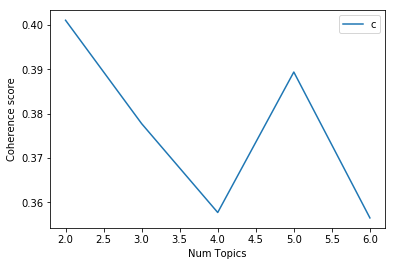

time: 127 ms


In [30]:
# Show graph
limit=7; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4011
Num Topics = 3  has Coherence Value of 0.3777
Num Topics = 4  has Coherence Value of 0.3577
Num Topics = 5  has Coherence Value of 0.3894
Num Topics = 6  has Coherence Value of 0.3565
time: 24.9 ms


In [34]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.027*"get" + 0.025*"ticket" + 0.022*"go" + 0.020*"time" + 0.019*"aquarium" '
  '+ 0.014*"show" + 0.013*"see" + 0.011*"exhibit" + 0.010*"crowd" + '
  '0.010*"online"'),
 (1,
  '0.039*"show" + 0.024*"see" + 0.021*"aquarium" + 0.020*"sea" + '
  '0.016*"dolphin" + 0.015*"get" + 0.015*"shark" + 0.014*"whale" + '
  '0.012*"penguin" + 0.011*"animal"'),
 (2,
  '0.050*"aquarium" + 0.030*"whale" + 0.026*"shark" + 0.020*"visit" + '
  '0.017*"see" + 0.016*"exhibit" + 0.013*"tank" + 0.012*"atlanta" + '
  '0.011*"good" + 0.011*"place"'),
 (3,
  '0.029*"aquarium" + 0.023*"time" + 0.021*"get" + 0.019*"show" + 0.018*"go" + '
  '0.014*"experience" + 0.013*"see" + 0.013*"would" + 0.012*"visit" + '
  '0.011*"dolphin"'),
 (4,
  '0.022*"food" + 0.019*"staff" + 0.018*"aquarium" + 0.015*"great" + '
  '0.015*"show" + 0.014*"place" + 0.012*"experience" + 0.011*"visit" + '
  '0.011*"family" + 0.010*"price"')]
time: 66.8 ms


In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
#pyLDAvis.save_html(vis, 'lda_4.html')
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      25.712830        1       1  0.065471  0.081286
1      23.195292        1       2  0.057122  0.067025
0      20.894070        1       3  0.024265 -0.102961
3      17.987839        1       4  0.015866 -0.078569
4      12.209964        1       5 -0.162725  0.033219, topic_info=     Category          Freq           Term         Total  loglift  logprob
term                                                                      
56    Default   3510.000000           food   3510.000000  30.0000  30.0000
107   Default   5509.000000         ticket   5509.000000  29.0000  29.0000
133   Default   3089.000000          staff   3089.000000  28.0000  28.0000
89    Default  10758.000000            get  10758.000000  27.0000  27.0000
25    Default   9704.000000          whale   9704.000000  26.0000  26.0000
23    Default   8780.000000          shark   8780.000000  25.0000  25.0000
108   Default   8989.000000           time   8989.000000  24.0000  24.0000
104   Default  14397.000000           show  14397.000000  23.0000  23.0000
245   Default   2517.000000        penguin   2517.000000  22.0000  22.0000
515   Default   4534.000000           tank   4534.000000  21.0000  21.0000
1583  Default   1205.000000           dive   1205.000000  20.0000  20.0000
1626  Default    758.000000  knowledgeable    758.000000  19.0000  19.0000
194   Default   1643.000000       friendly   1643.000000  18.0000  18.0000
876   Default   1292.000000             pm   1292.000000  17.0000  17.0000
168   Default   5184.000000          place   5184.000000  16.0000  16.0000
99    Default   1980.000000         online   1980.000000  15.0000  15.0000
214   Default   6366.000000            sea   6366.000000  14.0000  14.0000
317   Default   8354.000000          visit   8354.000000  13.0000  13.0000
385   Default   1904.000000           year   1904.000000  12.0000  12.0000
61    Default   2919.000000          price   2919.000000  11.0000  11.0000
549   Default   2847.000000            fun   2847.000000  10.0000  10.0000
505   Default   2824.000000        parking   2824.000000   9.0000   9.0000
204   Default   5878.000000     experience   5878.000000   8.0000   8.0000
280   Default   3702.000000         family   3702.000000   7.0000   7.0000
94    Default   3480.000000            lot   3480.000000   6.0000   6.0000
372   Default   1637.000000            old   1637.000000   5.0000   5.0000
26    Default  21536.000000       aquarium  21536.000000   4.0000   4.0000
711   Default   2007.000000            ray   2007.000000   3.0000   3.0000
981   Default   1545.000000          ocean   1545.000000   2.0000   2.0000
408   Default   1571.000000       purchase   1571.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
61     Topic5    944.200012          price   2919.837891   0.9740  -4.5647
533    Topic5    429.713165            son    913.627502   1.3486  -5.3519
600    Topic5    752.542053           nice   2171.925293   1.0430  -4.7916
168    Topic5   1290.435791          place   5184.075195   0.7123  -4.2523
629    Topic5    394.300110        helpful    863.070435   1.3195  -5.4379
388    Topic5    291.823517      enjoyable    536.060059   1.4948  -5.7389
280    Topic5    973.937622         family   3702.937012   0.7674  -4.5337
281    Topic5   1376.769775          great   6690.635742   0.5219  -4.1875
94     Topic5    895.704590            lot   3480.653809   0.7456  -4.6174
294    Topic5    457.852234            eat   1145.200684   1.1861  -5.2885
549    Topic5    773.310303            fun   2847.635742   0.7994  -4.7643
800    Topic5    442.520752         pricey   1101.061523   1.1914  -5.3225
204    Topic5   1091.136719     experience   5878.864258   0.4188  -4.4200
95     Topic5    854.155762           love   4265.716797   0.4947  -4.6649
1590   Topic5    338.319275    educational    690.1064

time: 11 s
